In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.set_option('max_columns',None)

In [177]:
df=pd.read_csv('clinvar_conflicting.csv',dtype={0: object, 38: str, 40: object})

##### I start this off with a lot of EDA. [Click here](#Data-cleaning) to jump to the data cleaning, preprocessing and model training.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [6]:
df.head(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955563G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,0,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,61,11,4,R/P,cGg/cCg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.955597G>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,95,45,15,P,ccG/ccT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.955619G>C,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,1,C,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,1/39,NaN,117,67,23,V/L,Gtc/Ctc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.957640C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,2/39,NaN,311,261,87,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.976059C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,1,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,4/39,NaN,576,526,176,L,Ctg/Ttg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN
5,1,976554,C,G,0.0000,0.01494,0.0256,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.976554C>G,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,G,splice_region_variant&synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,5/39,NaN,779,729,243,G,ggC/ggG,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.552,0.094740,NaN
6,1,976563,C,T,0.0000,0.00135,0.0098,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.976563C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,5/39,NaN,788,738,246,D,gaC/gaT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,9.846,0.862789,NaN
7,1,976598,C,T,0.0000,0.00626,0.0056,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.976598C>T,NaN,single_nucleotide_variant,NaN,SO:0001583|missense_variant,1.0,NaN,0,T,missense_variant,MODERATE,AGRN,Transcript,NM_001305275.1,protein_coding,5/39,NaN,823,773,258,T/I,aCc/aTc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,24.000,4.293015,-1.0
8,1,976629,C,T,0.0000,0.01004,0.0411,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",NaN,NC_000001.10:g.976629C>T,NaN,single_nucleotide_variant,NaN,SO:0001819|synonymous_variant,1.0,NaN,0,T,synonymous_variant,LOW,AGRN,Transcript,NM_001305275.1,protein_coding,5/39,NaN,854,804,268,A,gcC/gcT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,13.510,1.537558,NaN
9,1,976963,A,G,0.0141,0.00461,0.0126,"MedGen:C3808739,OMIM:615120|MedGen:C

In [7]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

##### Univariate distributions

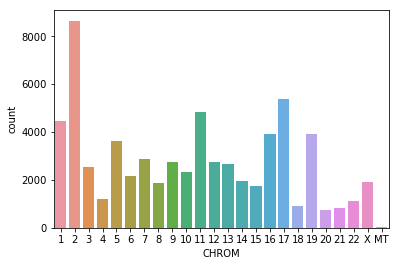

In [8]:
sns.countplot(x='CHROM',data=df)

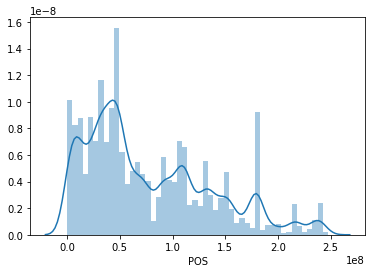

In [9]:
sns.distplot(df['POS'])

In [10]:
df['REF'].value_counts()[np.logical_and(df['REF'].value_counts().values>1,df['REF'].value_counts().values<15)]

AAAG       14
GG         13
ATCT       12
TGAA       12
TGA        12
TAA        12
AAG        12
TTC        10
CAAG       10
ACTT        9
AAGG        9
CC          9
CTCT        9
ATC         8
TCA         8
TTG         8
TGAG        8
CAAAG       7
GTTC        7
AAT         7
CAGG        7
TAGA        7
AGAG        7
GGA         7
GTT         6
GCT         6
GAC         6
CTTTG       6
ACTC        6
AGT         6
           ..
GCCT        2
CGAA        2
GGCCGCC     2
TCTA        2
ACTTT       2
TAGAA       2
AGTTT       2
CTAG        2
TACA        2
TTAA        2
TTGC        2
CACAA       2
TTCA        2
GAAGT       2
GAAC        2
AGTT        2
TACTG       2
GAAAC       2
TCG         2
GTTCTT      2
CACTG       2
ACAAT       2
ATT         2
CCAT        2
ATATC       2
CGT         2
CCTTA       2
GTTTC       2
TGCCGCC     2
AAGTT       2
Name: REF, Length: 183, dtype: int64

In [11]:
df['ALT'].value_counts()

T                                                                              20409
A                                                                              20205
G                                                                              11782
C                                                                              11429
TA                                                                               118
CT                                                                                93
CA                                                                                77
AT                                                                                75
GA                                                                                67
GT                                                                                64
TG                                                                                51
GC                                                               

Could bin allele sequences that are longer than 4 bp into one

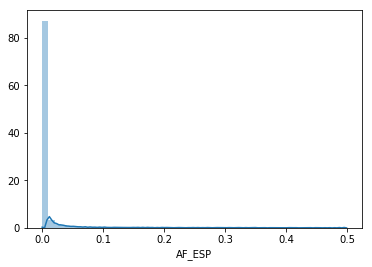

In [12]:
sns.distplot(df['AF_ESP'])

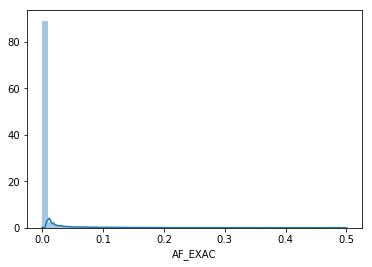

In [13]:
sns.distplot(df['AF_EXAC'])

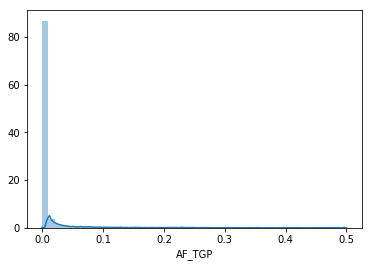

In [14]:
sns.distplot(df['AF_TGP'])

Should log transform these if using a linear method

In [15]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

In [16]:
df['CLNDISDB'].value_counts()

MedGen:CN169374                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               5344
MedGen:C0027672,SNOMED_CT:699346009|MedGen:CN169374                                                  

In [31]:
df['CLNDISDBINCL'].value_counts()

.                                                                                                                                                                                                                                      7
MedGen:CN169374                                                                                                                                                                                                                        7
MedGen:C0220754,OMIM:253260,Orphanet:ORPHA79241,SNOMED_CT:8808004                                                                                                                                                                      5
MedGen:C1263858,OMIM:607855,Orphanet:ORPHA258,SNOMED_CT:111503008                                                                                                                                                                      3
MedGen:C0020445,OMIM:143890,SNOMED_CT:397915002,SNOMED_CT:398036000 

In [32]:
df['CLNDN'].value_counts()

not_specified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             5344
Hereditary_cancer-predisposing_syndrome|not_specified                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [105]:
df['CLNHGVS'].value_counts()

NC_000008.10:g.43047593G>A                            1
NC_000011.9:g.65488239T>C                             1
NC_000002.11:g.167137045A>G                           1
NC_000006.11:g.7566637G>C                             1
NC_000008.10:g.90967626T>C                            1
NC_000016.9:g.75675609T>C                             1
NC_000002.11:g.152388416delT                          1
NC_000023.10:g.135098806G>A                           1
NC_000002.11:g.50724620C>T                            1
NC_000008.10:g.90958400C>T                            1
NC_000006.11:g.32007887G>T                            1
NC_000020.10:g.43048434C>T                            1
NC_000007.13:g.6022474G>A                             1
NC_000017.10:g.33428321A>T                            1
NC_000023.10:g.38145911C>T                            1
NC_000009.11:g.98209367G>A                            1
NC_000005.9:g.127693094T>C                            1
NC_000012.11:g.56398531G>A                      

In [33]:
df['CLNDNINCL'].value_counts()

not_specified                                                                                                                                 7
Biotinidase_deficiency                                                                                                                        5
Merosin_deficient_congenital_muscular_dystrophy                                                                                               3
Familial_hypercholesterolemia                                                                                                                 3
Multiple_gastrointestinal_atresias                                                                                                            2
21-hydroxylase_deficiency                                                                                                                     2
Minicore_myopathy                                                                                                                       

In [34]:
df['CLNSIGINCL'].value_counts()

190388:Pathogenic                                    2
424764:Likely_pathogenic                             2
157525:Uncertain_significance                        2
12182:Pathogenic                                     2
179465:Uncertain_significance                        2
430769:Pathogenic                                    2
441531:Pathogenic                                    2
424791:Likely_pathogenic                             2
38562:Pathogenic                                     1
10382:other                                          1
13906:Pathogenic                                     1
140570:Pathogenic                                    1
12304:Pathogenic                                     1
440850:Pathogenic                                    1
402236:Likely_pathogenic                             1
427816:Likely_pathogenic                             1
236068:Pathogenic                                    1
38566:Pathogenic|38568:Pathogenic                    1
446730:oth

Let's try dropping 

CLNDISDB               
CLNDISDBINCL             
CLNDN                  
CLNDNINCL                
CLNHGVS               
CLNSIGINCL 

CLNVI 

 for now

In [94]:
df['CLNVC'].value_counts()

single_nucleotide_variant    61281
Deletion                      2509
Duplication                   1034
Indel                          247
Insertion                       95
Inversion                       17
Microsatellite                   5
Name: CLNVC, dtype: int64

In [104]:
df['CLNVI'].value_counts()

UniProtKB_(protein):P04637                                                                                                124
UniProtKB_(protein):Q14524                                                                                                 75
UniProtKB_(protein):Q13315                                                                                                 54
UniProtKB_(protein):P51787                                                                                                 53
UniProtKB_(protein):P38398                                                                                                 50
UniProtKB_(protein):O75445                                                                                                 48
UniProtKB_(protein):Q12809                                                                                                 39
UniProtKB_(protein):P12883                                                                                            

In [93]:
df['ORIGIN'].value_counts(dropna=False)

 1.0      58216
NaN        6123
 33.0       246
 5.0        149
 3.0        142
 17.0       139
 9.0        100
 0.0         13
 25.0        11
 32.0        10
 49.0         7
 513.0        5
 65.0         4
 21.0         3
 2.0          3
 13.0         2
 41.0         2
 16.0         2
 4.0          2
 27.0         1
 129.0        1
 43.0         1
 35.0         1
 29.0         1
 37.0         1
 12.0         1
 69.0         1
 53.0         1
Name: ORIGIN, dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [42]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

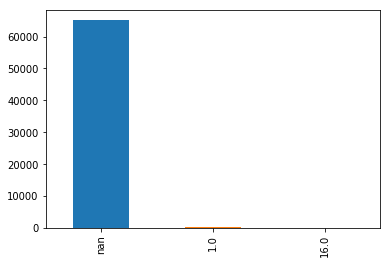

In [48]:
df['SSR'].value_counts(dropna=False).plot.bar()

In [90]:
df['SSR'].value_counts(dropna=False)

NaN      65084
 1.0        95
 16.0        9
Name: SSR, dtype: int64

May want to drop this column

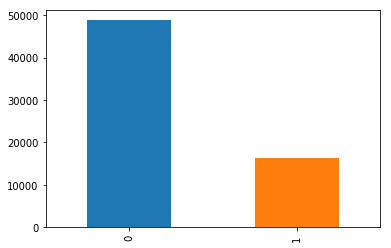

In [46]:
df['CLASS'].value_counts().plot.bar()

In [67]:
df['CLASS'].value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

In [50]:
df['Consequence'].value_counts()

missense_variant                                                  31444
synonymous_variant                                                17668
intron_variant                                                     4403
splice_region_variant&intron_variant                               3393
frameshift_variant                                                 1774
stop_gained                                                        1702
missense_variant&splice_region_variant                              964
5_prime_UTR_variant                                                 626
inframe_deletion                                                    583
splice_region_variant&synonymous_variant                            552
splice_donor_variant                                                539
3_prime_UTR_variant                                                 428
splice_acceptor_variant                                             401
inframe_insertion                                               

Split out into multiple columns

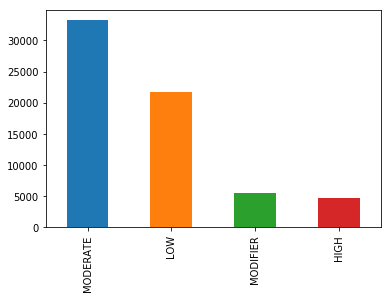

In [51]:
df['IMPACT'].value_counts(dropna=False).plot.bar()

In [52]:
df['SYMBOL'].value_counts()

TTN         2765
BRCA2       1934
ATM         1909
APC         1228
BRCA1       1075
MSH6        1048
LDLR         905
PALB2        794
NF1          732
TSC2         640
BRIP1        627
PMS2         600
MSH2         596
POLE         571
CDH1         553
CHEK2        491
BARD1        490
SMARCA4      451
MYBPC3       441
RAD50        426
SYNE1        422
TP53         420
POLD1        404
NBN          397
MLH1         395
MUTYH        391
PLEC         379
STK11        359
MYH7         333
NEB          321
            ... 
SNAPC5         1
CACNG2         1
CFH            1
KRT74          1
KIF5C          1
WDR73          1
GPLD1          1
SLC4A4         1
STAMBP         1
MCM4           1
FASN           1
ALX1           1
CTCF           1
SLC25A46       1
KLHL24         1
PTF1A          1
GPHN           1
HCCS           1
ARL6           1
TAP2           1
ARHGEF15       1
VAV1           1
CEP120         1
PAX8           1
KIF11          1
ACD            1
PRSS56         1
ENTPD1        

Not quite sure how to treat this yet - still a lot of categories here

In [53]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [55]:
df['Feature_type'].value_counts(dropna=False)

Transcript      65172
NaN                14
MotifFeature        2
Name: Feature_type, dtype: int64

Probably will drop this feature as well

In [57]:
df['Feature'].value_counts(dropna=False)

NM_001267550.1    2765
NM_000059.3       1934
NM_000051.3       1909
XM_005271975.1    1228
NM_007300.3       1075
NM_000179.2       1048
NM_000527.4        905
NM_024675.3        794
XM_005257983.1     732
XM_005255527.1     640
NM_032043.2        627
NM_001322014.1     600
NM_000251.2        596
NM_006231.2        571
NM_004360.3        553
NM_001005735.1     491
NM_000465.2        489
XM_005260025.1     451
NM_000256.3        441
NM_005732.3        426
XM_005266877.1     422
NM_000546.5        420
NM_001308632.1     404
NM_002485.4        397
NM_000249.3        395
NM_001128425.1     391
XM_005250976.1     379
XM_005259617.1     359
NM_000257.2        333
NM_001271208.1     321
                  ... 
NM_000602.4          1
NM_001031710.2       1
NM_001114748.1       1
NM_005708.3          1
NM_004625.3          1
NM_153223.3          1
NM_000207.2          1
NM_000824.4          1
NM_003332.3          1
NM_002282.3          1
NM_001136271.2       1
NM_025207.4          1
NM_005589.3

This is the same as SYMBOL, so should drop

In [59]:
df['BIOTYPE'].value_counts(dropna=False)

protein_coding    65158
NaN                  16
misc_RNA             14
Name: BIOTYPE, dtype: int64

Probably will drop this column

In [108]:
df['EXON'].value_counts(dropna=False)

NaN        8893
16/16      1129
11/27       807
4/10        752
3/3         581
2/2         570
10/24       525
326/363     368
4/13        368
4/4         354
4/11        342
8/8         336
1/10        324
9/10        323
11/11       305
1/1         288
10/16       268
11/15       267
13/16       265
10/10       264
5/13        261
12/16       259
8/10        258
3/16        257
2/3         248
1/3         245
5/10        240
6/10        236
2/16        227
2/10        227
           ... 
106/106       1
5/116         1
151/363       1
47/56         1
102/146       1
56/116        1
51/72         1
15/55         1
18/67         1
130/363       1
14/102        1
142/146       1
28/78         1
45/70         1
17/116        1
81/90         1
31/55         1
35/86         1
53/74         1
37/46         1
20/46         1
7/74          1
25/67         1
16/65         1
2/74          1
13/45         1
32/50         1
60/82         1
50/183        1
17/102        1
Name: EXON, Length: 3265

Should split this into two columns

In [109]:
df['INTRON'].value_counts(dropna=False)

NaN        56385
47/362        93
2/9           68
3/9           65
5/9           54
4/9           54
5/15          53
8/9           51
9/9           51
7/9           48
10/15         47
6/10          46
4/15          46
1/15          45
3/8           44
2/15          43
6/9           42
3/10          40
12/15         40
11/15         40
6/15          40
14/15         39
4/10          37
10/10         37
7/15          37
9/15          37
8/8           36
2/2           35
1/2           34
7/8           34
           ...  
37/78          1
82/105         1
110/145        1
1/77           1
1/49           1
150/182        1
49/64          1
20/37          1
31/56          1
27/28          1
18/92          1
20/50          1
27/61          1
33/89          1
14/50          1
84/145         1
19/89          1
51/78          1
242/362        1
5/58           1
4/41           1
48/362         1
6/49           1
16/81          1
26/182         1
10/54          1
110/362        1
87/362        

Should also split this into two columns

In [62]:
df['cDNA_position'].value_counts()

852            31
878            30
789            29
1201           29
452            29
433            29
729            29
432            28
1253           28
327            28
566            28
799            28
1049           27
1044           27
560            27
907            27
576            27
640            27
988            27
980            26
401            26
445            26
891            26
598            26
955            26
728            26
362            26
1491           26
610            26
525            26
               ..
7295            1
14859           1
68185           1
84601           1
77941           1
11071           1
8964            1
8677            1
5372            1
10950           1
95373           1
14115           1
44061           1
67123           1
72165           1
58861           1
3679-3680       1
8807            1
91557           1
12621-12622     1
53078           1
31082           1
106863          1
89933           1
6482      

Should likely convert to numeric

In [63]:
df['CDS_position'].value_counts()

1                36
696              35
465              32
379              32
402              31
207              30
507              30
769              30
606              30
3                30
456              30
27               30
132              29
267              29
246              29
2                29
147              29
79               29
510              29
726              29
189              29
366              28
567              28
459              28
84               28
474              28
170              28
34               28
831              28
876              28
                 ..
187-189           1
10371             1
9770              1
3547              1
10786             1
12064             1
4662              1
15202             1
3845-3846         1
1640-1652         1
3180-3184         1
5781-5782         1
102798-102800     1
39056             1
21779             1
3806-3807         1
10789             1
30231             1
44281             1


Should also likely convert this to numeric

In [64]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

In [65]:
df['Protein_position'].value_counts()

1              100
27              80
127             78
69              75
12              74
158             73
11              72
196             71
38              71
155             71
57              71
90              71
2               70
339             70
242             69
78              69
232             69
50              69
34              69
15              69
216             69
9               69
72              68
3               68
53              68
39              68
63              68
227             68
21              68
106             67
              ... 
3112             1
7282             1
18990            1
24111            1
3093             1
3922             1
1231-1232        1
3697             1
3850             1
27585            1
2215             1
370-371          1
4838             1
29967-29968      1
22197            1
27564            1
27296            1
8965             1
516-519          1
2311-2314        1
5074             1
8673        

Same here

In [67]:
df['Amino_acids'].value_counts()

A                                       2005
L                                       2003
P                                       1858
S                                       1710
T                                       1677
R/Q                                     1421
R/H                                     1350
G                                       1121
R/C                                     1118
A/T                                     1042
D                                        994
R                                        933
P/L                                      922
E/K                                      893
V                                        891
A/V                                      870
R/W                                      864
V/I                                      859
N                                        750
I/V                                      745
R/*                                      743
V/M                                      680
I         

In [68]:
df['Codons'].value_counts()

cGg/cAg                                      915
Cgg/Tgg                                      852
cGc/cAc                                      769
Cga/Tga                                      734
Cgc/Tgc                                      730
gaC/gaT                                      701
gcG/gcA                                      681
Gtg/Atg                                      680
ccG/ccA                                      643
gcC/gcT                                      614
acG/acA                                      593
aCg/aTg                                      589
cGt/cAt                                      581
aaC/aaT                                      556
Gag/Aag                                      546
cGa/cAa                                      502
cCg/cTg                                      494
ccC/ccT                                      477
taC/taT                                      468
aAt/aGt                                      456
ggC/ggT             

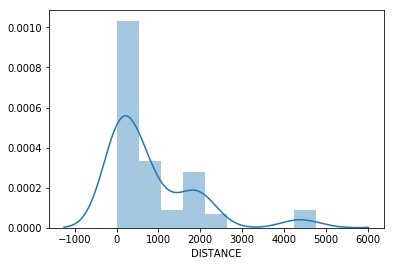

In [71]:
sns.distplot(df['DISTANCE'].dropna())

In [72]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

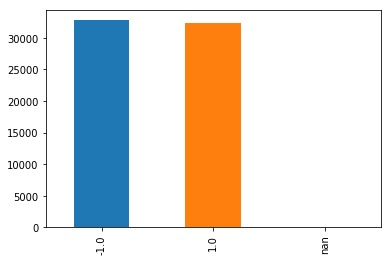

In [76]:
df['STRAND'].value_counts(dropna=False).plot.bar()

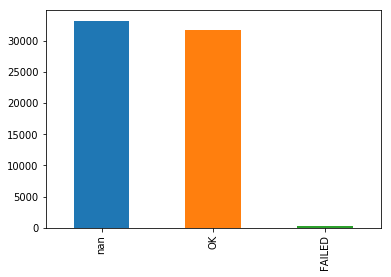

In [78]:
df['BAM_EDIT'].value_counts(dropna=False).plot.bar()

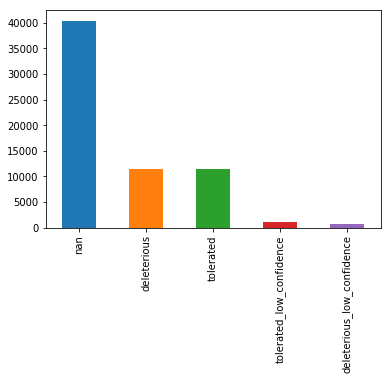

In [79]:
df['SIFT'].value_counts(dropna=False).plot.bar()

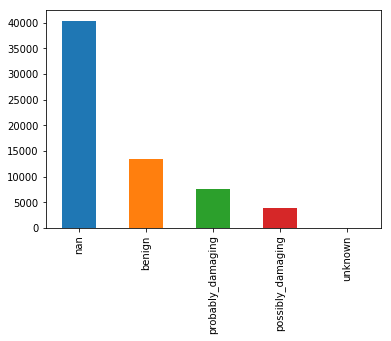

In [80]:
df['PolyPhen'].value_counts(dropna=False).plot.bar()

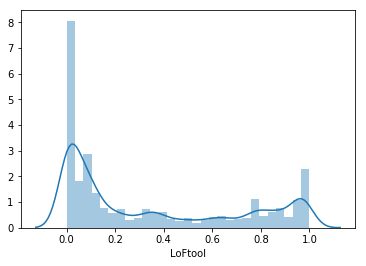

In [82]:
sns.distplot(df['LoFtool'].dropna())

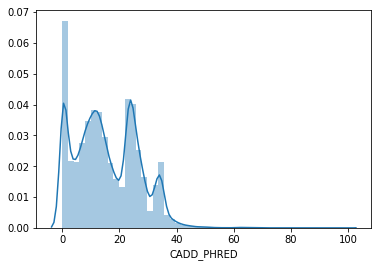

In [83]:
sns.distplot(df['CADD_PHRED'].dropna())

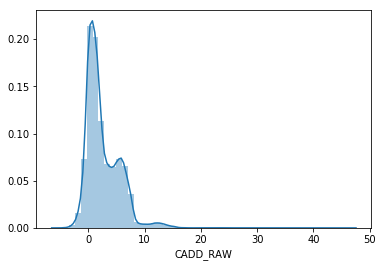

In [84]:
sns.distplot(df['CADD_RAW'].dropna())

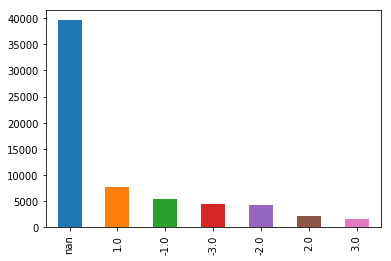

In [87]:
df['BLOSUM62'].value_counts(dropna=False).plot.bar()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

In [89]:
df.nunique()

CHROM                    24
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             48
CLNDN                  9260
CLNDNINCL                54
CLNHGVS               65188
CLNSIGINCL               68
CLNVC                     7
CLNVI                 26289
MC                       89
ORIGIN                   27
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

## Data cleaning
#### TODO:

CHROM - categ  
REF,ALT - is length sufficient? How about allele content (number of A, T, C, G)?
* how to bin?
    
CLNDN - not_specified was the default - should we do more than that?  drop (for now)

CLNDISDB - drop

CNLDISDBINCL - drop

CLNDNINCL - drop

CLNDSIGINCL - drop

CLNVI - just keep lab name to pare down categories - drop

CLNVC - near-zero variance predictor, keep as is - drop

MC vs Consequence - probably just keep Consequence, but I'd like to examine these classes more carefully  

ORIGIN - could be near-zero, further investigation - keep, categ, fillna=0

SSR - should drop  (or give 0 code to NA?)

CLASS - has some class imbalance

Allele - carries different information, should keep, treat as REF, ALT

Consequence - keep

IMPACT - keep

SYMBOL (gene name) - keep

Feature_type - near-zero, likely drop? (but try out) 

Feature - same as SYMBOL, drop  

BIOTYPE - near zero, likely drop  

EXON, INTRON - class as is_exon, is_intron, split numbers into 2 columns  

positions - start, stop  

DISTANCE - drop  

BAM_EDIT,SIFT,STRAND,PolyPhen - categ, fillna

MOTIF_*, HIGH_INF_POS - drop (but examine their effects on the 2 rows that have them)

SYMBOL, Amino_acid, Codons - not sure yet. These have a lot of categories, but many of the categories are not very small. Try feature hashing. Can also try clustering according to class.  

BLOSUM62 - drop for now


In [115]:
df['SSR'].value_counts()

1.0     95
16.0     9
Name: SSR, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele                65188 non-null object
Consequence        

Things to look at more closely:
* Relationship between AF_ESP,AF_EXAC,and AF_TGP


In [7]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
import copy

NAN_SUBSTITUTION_VALUE = 'novalue'

def one_hot(df,cols):
    for each in cols:
        dummies = pd.get_dummies(df[each],prefix=each,drop_first=False)
        df = pd.concat([df,dummies],axis=1)
    return df

        
# clean removes NAs (or replaces them appropriately), adds dummy columns and drops irrelevant columns
def clean(unclean_df):
    df=copy.deepcopy(unclean_df)
    
    # drop MC and CLNDN for now
    drop_cols = ['CLNDISDB','CLNDISDBINCL','CLNDNINCL','CLNSIGINCL','MC','Feature','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE','DISTANCE','BIOTYPE',
                'Feature_type','CLNDN','CLNVI','CLNHGVS','BLOSUM62','SSR','CLNVC']
    df.drop(columns=drop_cols,inplace=True)
    
    # make categ/fillna
    categ_cols = ['ORIGIN','SYMBOL','Amino_acids','Codons','STRAND','BAM_EDIT','SIFT','PolyPhen']
    
    for each in categ_cols:
        df[each] = df[each].astype('category')
        df[each]=df[each].cat.add_categories([NAN_SUBSTITUTION_VALUE])
        df[each].fillna(NAN_SUBSTITUTION_VALUE,inplace=True)
    
    
    
    # make numeric
    numer_cols = ['EXON','INTRON']
    for each in numer_cols:
        df[each].fillna('0/0',inplace=True)
        df[each+'_NUMBER']=pd.to_numeric(df[each].apply(lambda s: str(s).split('/')[0]))
        df[each+'_OUTOF']=pd.to_numeric(df[each].apply(lambda s: str(s).split('/')[1]))
        df[each+'_NA']= np.where((df[each+'_OUTOF']==0),1,0)
    df.drop(columns=numer_cols,inplace=True)
    
    numer_cols=['cDNA_position','CDS_position','Protein_position']
    for each in numer_cols:
        df[each].fillna(0,inplace=True)
        df[each+'_NA']=np.where((df[each]==0),1,0)
        df[each+'_START']=df[each].apply(lambda s: str(s).split('-')[0])
        df[each+'_STOP']=df[each].apply(lambda s: str(s).split('-')[-1])
        # replace question marks with adjacent value
        df[each+'_START']=pd.to_numeric(df[each+'_START'].replace({'?':np.nan}).fillna(df[each+'_STOP']))
        df[each+'_STOP']=pd.to_numeric(df[each+'_STOP'].replace({'?':np.nan}).fillna(df[each+'_START']))
    df.drop(columns=numer_cols,inplace=True)
    
    # fillna in remaining numeric columns
    numer_cols=['LoFtool','CADD_PHRED','CADD_RAW']
    for each in numer_cols:
        df[each].fillna(0.0,inplace=True)
        
    # cluster numerous classes in categ columns
    cols = {'REF':10,'ALT':10,'Allele':5,'SYMBOL':330,'Amino_acids':600,'Codons':400}
    for key,value in cols.items():
        vals=df[key].value_counts()
        df[key]=np.where(df[key].isin(vals[vals>value].index),df[key],'Other')
        
    # one-hot encode
    cols=df.select_dtypes([object,'category']).columns
    df=one_hot(df,cols)
    df.drop(columns=cols,inplace=True)
    
    # return DV separately
    dv=df['CLASS']
    df.drop(columns=['CLASS'],inplace=True)
    
    return dv,df
def feature_importances(model,num_feat=10):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(num_feat):
        print("%d. "% (f + 1)+train_X.columns[indices[f]]+" (%f)" % (importances[indices[f]]))

In [247]:
dv,clean_df = clean(df)

#### Logistic regression

In [8]:
import sklearn.linear_model as lm
import sklearn.metrics as met
from sklearn.model_selection import GridSearchCV

In [234]:
logreg = lm.LogisticRegression()

In [235]:
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10], 
              'penalty': ['l1','l2']}
gs = GridSearchCV(estimator=logreg, 
                  param_grid=param_grid, 
                  cv=3,
                  verbose=3,
                  n_jobs=3,
                  scoring='f1')

In [236]:
gs.fit(clean_df,dv)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    8.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [237]:
gs.best_score_

0.09926693766106294

#### Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf=RandomForestClassifier()

In [271]:
param_grid = {'n_estimators': [10,20,50,100], 
              'max_features': ['auto','sqrt']}
grf = GridSearchCV(estimator=rf, 
                  param_grid=param_grid,
                  n_jobs=3,
                  cv=3,verbose=3,scoring='f1')

In [272]:
grf.fit(clean_df,dv)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:   57.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [273]:
grf.best_score_

0.23957508605629502

In [276]:
pd.DataFrame(grf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.423954,0.028212,0.106334,0.000454,auto,10,"{'max_features': 'auto', 'n_estimators': 10}",0.246996,0.228190,0.216566,0.230584,0.012538,2,0.965101,0.962620,0.963124,0.963615,0.001071
1,2.596213,0.091995,0.170865,0.001702,auto,20,"{'max_features': 'auto', 'n_estimators': 20}",0.256760,0.228046,0.189849,0.224886,0.027408,4,0.990976,0.990789,0.991583,0.991116,0.000339
2,6.511621,0.117154,0.351406,0.004388,auto,50,"{'max_features': 'auto', 'n_estimators': 50}",0.240618,0.215819,0.184431,0.213623,0.022991,5,0.999452,0.999315,0.999315,0.999361,0.000065
3,13.487286,0.196825,0.667375,0.010617,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",0.209370,0.209246,0.175717,0.198111,0.015835,7,0.999954,0.999863,0.999863,0.999894,0.000043
4,1.691210,0.040556,0.123088,0.005773,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.265732,0.246066,0.206926,0.239575,0.024443,1,0.964262,0.964828,0.963274,0.964121,0.000642
5,3.220237,0.037445,0.250849,0.005730,sqrt,20,"{'max_features': 'sqrt', 'n_estimators': 20}",0.252508,0.229556,0.195878,0.225981,0.023257,3,0.990235,0.990977,0.990324,0.990512,0.000331
6,6.793347,0.243989,0.357279,0.002443,sqrt,50,"{'max_features': 'sqrt', 'n_estimators': 50}",0.231950,0.211244,0.192245,0.211813,0.016215,6,0.999361,0.999315,0.999041,0.999239,0.000141
7,13.080074,0.239555,0.663259,0.014678,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.207841,0.197743,0.170961,0.192182,0.015561,8,0.999954,0.999863,0.999954,0.999924,0.000043


#### Feature importances

In [15]:
from sklearn.model_selection import train_test_split

In [292]:
train_X,val_X,train_y,val_y = train_test_split(clean_df,dv,random_state=10)

##### Random forest

In [293]:
model = rf.fit(train_X,train_y)

In [16]:
from sklearn.metrics import f1_score,roc_auc_score

In [295]:
f1_score(model.predict(val_X),val_y)

0.30671036743143004

In [296]:
roc_auc_score(model.predict(val_X),val_y)

0.654557332772107

In [291]:
feature_importances(model,20)

Feature ranking:
1. AF_EXAC (0.076527)
2. AF_TGP (0.058021)
3. POS (0.055096)
4. CADD_RAW (0.053960)
5. CADD_PHRED (0.052428)
6. AF_ESP (0.042061)
7. cDNA_position_STOP (0.040230)
8. cDNA_position_START (0.039589)
9. CDS_position_STOP (0.038195)
10. CDS_position_START (0.037971)
11. Protein_position_STOP (0.036826)
12. Protein_position_START (0.036708)
13. LoFtool (0.036624)
14. EXON_NUMBER (0.029065)
15. EXON_OUTOF (0.028666)
16. INTRON_NUMBER (0.009803)
17. REF_G (0.007304)
18. BAM_EDIT_OK (0.007220)
19. BAM_EDIT_novalue (0.007215)
20. INTRON_OUTOF (0.007180)


* Clearly, the AF values are important. The fact that they seem to have such high variance is concerning.
* Should try FEATURE HASHING for features that have more than 10 unique features, instead of lumping together low value_counts (had very little impact on score)
* Could try adding in some of the CLN features that I removed
* F1-score of 0.65 is what to beat (and AUC of 0.82)
* There also exists some CLASS IMBALANCE in the dv (should try adding back outsampled rows to validation set) - doubled the F1 score
* Should normalize numerical data
* Features indicating length of base pairs in REF, ALT, etc
* Impute data instead of fillna?
* Scale POS (since different chromosomes have different scales) - scaling boosted F1 by about 0.01
* Other ordered data? scale it to [0,1]
* 

Let's take another pass at preprocessing:

In [300]:
import copy
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split

def clean2(unclean_df,feature_hashing=True,encode=True):
    df=copy.deepcopy(unclean_df)
    
    # drop MC and CLNDN for now
    drop_cols = ['CLNDISDB','CLNDISDBINCL','CLNDNINCL','CLNSIGINCL','MC','Feature','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE','DISTANCE','BIOTYPE',
                'Feature_type','CLNDN','CLNVI','CLNHGVS','BLOSUM62','SSR','CLNVC']
    df.drop(columns=drop_cols,inplace=True)
    
    df['ORIGIN']=df['ORIGIN'].astype(pd.Int64Dtype())
    df['STRAND']=df['STRAND'].astype(pd.Int64Dtype())
    
    # make categ/fillna
    categ_cols = ['ORIGIN','SYMBOL','Amino_acids','Codons','STRAND','BAM_EDIT','SIFT','PolyPhen']
    df['POS']=MinMaxScaler().fit_transform(df['POS'].values.reshape(-1,1))
    
    for each in categ_cols:
        df[each] = df[each].astype('category')
        df[each]=df[each].cat.add_categories([NAN_SUBSTITUTION_VALUE])
        df[each].fillna(NAN_SUBSTITUTION_VALUE,inplace=True)
    


    # make numeric
    numer_cols = ['EXON','INTRON']
    for each in numer_cols:
        df[each].fillna('0/0',inplace=True)
        df[each+'_NUMBER']=pd.to_numeric(df[each].apply(lambda s: str(s).split('/')[0]))
        df[each+'_OUTOF']=pd.to_numeric(df[each].apply(lambda s: str(s).split('/')[1]))
        df[each+'_NA']= np.where((df[each+'_OUTOF']==0),1,0)
    df.drop(columns=numer_cols,inplace=True)
    
    numer_cols=['cDNA_position','CDS_position','Protein_position']
    for each in numer_cols:
        df[each].fillna(0,inplace=True)
        df[each+'_NA']=np.where((df[each]==0),1,0)
        df[each+'_START']=df[each].apply(lambda s: str(s).split('-')[0])
        df[each+'_STOP']=df[each].apply(lambda s: str(s).split('-')[-1])
        # replace question marks with adjacent value
        df[each+'_START']=pd.to_numeric(df[each+'_START'].replace({'?':np.nan}).fillna(df[each+'_STOP']))
        df[each+'_STOP']=pd.to_numeric(df[each+'_STOP'].replace({'?':np.nan}).fillna(df[each+'_START']))
    df.drop(columns=numer_cols,inplace=True)
    
    # fillna in remaining numeric columns - impute the mean rather than replace by zero (didn't really make a difference)
    numer_cols=['LoFtool','CADD_PHRED','CADD_RAW']
    for each in numer_cols:
        df[each].fillna(np.mean(df[each]),inplace=True)
        
    obj_cols=df.select_dtypes(include=[object]).columns
    for each in obj_cols:
        df[each]=df[each].astype('category')
        
    if encode:
        if feature_hashing:
            cols=['REF','ALT','Allele','SYMBOL','Amino_acids','Codons']
            fh = FeatureHasher(n_features = 5, input_type = 'string')
            for each in cols:
                hashed = pd.DataFrame(fh.fit_transform(df[each]).toarray()).add_prefix(each+'_')
                df = pd.concat([df,hashed],axis=1)
            df.drop(columns=cols,inplace=True)

        else:  
            # cluster numerous classes in categ columns
            cols = {'REF':10,'ALT':10,'Allele':5,'SYMBOL':330,'Amino_acids':600,'Codons':400}
            for key,value in cols.items():
                vals=df[key].value_counts()
                df[key]=np.where(df[key].isin(vals[vals>value].index),df[key],'Other')

        
        # one-hot encode
        cols=df.select_dtypes([object,'category']).columns
        df=one_hot(df,cols)
        df.drop(columns=cols,inplace=True)
    
    return df

def split_sample(df,downsample=False,oversample=False):
    train_X,val_X = train_test_split(df,random_state=16,test_size=0.8)
    
    # here only train_X is downsampled
    if downsample:
        g = train_X.groupby('CLASS')
        train_X=g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
    
    # oversample only in training set
    if oversample:
            lst = [train_X]
            max_size=train_X['CLASS'].value_counts().max()
            for class_index, group in train_X.groupby('CLASS'):
                lst.append(group.sample(max_size-len(group), replace=True))
            train_X = pd.concat(lst)        
    
    # return DV separately
    train_y=train_X['CLASS']
    train_X.drop(columns=['CLASS'],inplace=True)
    val_y=val_X['CLASS']
    val_X.drop(columns=['CLASS'],inplace=True)
    
    return train_X,val_X,train_y,val_y

In [144]:
train_X,val_X,train_y,val_y=split_sample(clean2(df,feature_hashing=True),downsample=True)

In [135]:
model = rf.fit(train_X,train_y)

In [136]:
f1_score(model.predict(val_X),val_y)

0.47446091018779196

Looks like class imbalance was the real kicker here - let's take a closer look at the confusion matrix

I oversampled before splitting into test/train - not good! (identical rows in both validation and training)

Blind oversampling did not help at all (I don't think) - may want to look more into that

Maybe SMOTE?

In [137]:
from sklearn.metrics import classification_report

In [138]:
classification_report(val_y,model.predict(val_X))

'              precision    recall  f1-score   support\n\n           0       0.83      0.70      0.76     39003\n           1       0.40      0.58      0.47     13148\n\n   micro avg       0.67      0.67      0.67     52151\n   macro avg       0.62      0.64      0.62     52151\nweighted avg       0.72      0.67      0.69     52151\n'

#### All in all, the support for conflicting cases looks much better than it does in other kernels (thanks downsampling!)

#### Feature importances and correlations

In [139]:
feature_importances(model,30)

Feature ranking:
1. AF_EXAC (0.081968)
2. AF_TGP (0.068691)
3. CADD_RAW (0.052368)
4. AF_ESP (0.046413)
5. POS (0.045894)
6. CADD_PHRED (0.043885)
7. cDNA_position_STOP (0.035451)
8. LoFtool (0.035450)
9. CDS_position_START (0.033387)
10. CDS_position_STOP (0.032797)
11. Protein_position_STOP (0.029960)
12. EXON_NUMBER (0.029912)
13. cDNA_position_START (0.029537)
14. Protein_position_START (0.028482)
15. EXON_OUTOF (0.026654)
16. SYMBOL_2 (0.016830)
17. SYMBOL_1 (0.016046)
18. Codons_2 (0.015663)
19. Codons_4 (0.015151)
20. SYMBOL_0 (0.012205)
21. SYMBOL_4 (0.011753)
22. Amino_acids_4 (0.011735)
23. Codons_1 (0.010869)
24. Amino_acids_1 (0.010261)
25. Amino_acids_2 (0.009661)
26. SYMBOL_3 (0.009455)
27. REF_1 (0.008125)
28. Codons_0 (0.007812)
29. INTRON_NUMBER (0.007720)
30. Amino_acids_3 (0.006894)


In [146]:
cl = clean2(df)

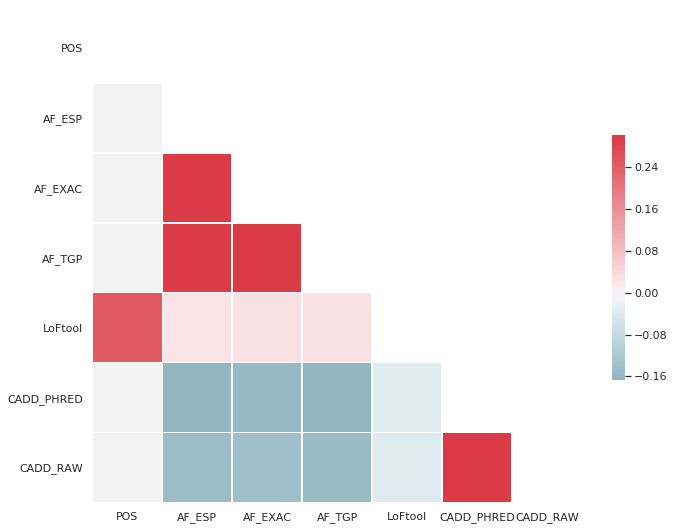

In [151]:
sns.set(style="white")


d = cl[['POS','AF_ESP','AF_EXAC','AF_TGP','LoFtool','CADD_PHRED','CADD_RAW']]
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [152]:
corr

,POS,AF_ESP,AF_EXAC,AF_TGP,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.250507,-0.005373,-0.009688
AF_ESP,0.007003,1.000000,0.851870,0.807741,0.026323,-0.164081,-0.148038
AF_EXAC,0.007721,0.851870,1.000000,0.805634,0.026582,-0.154813,-0.140732
AF_TGP,0.004225,0.807741,0.805634,1.000000,0.028236,-0.166964,-0.150904
LoFtool,0.250507,0.026323,0.026582,0.028236,1.000000,-0.037246,-0.037747
CADD_PHRED,-0.005373,-0.164081,-0.154813,-0.166964,-0.037246,1.000000,0.955003
CADD_RAW,-0.009688,-0.148038,-0.140732,-0.150904,-0.037747,0.955003,1.000000


##### Feature engineering with featuretools (work in progress)

In [155]:
!pip install featuretools
import featuretools as ft

    100% |████████████████████████████████| 204kB 8.7MB/s 
    100% |████████████████████████████████| 829kB 5.5MB/s 
  Stored in directory: /home/jovyan/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future


In [310]:
# This time, we'll wait to encode variables until after we've done some Deep Feature Synthesis on our original df
dff=clean2(df,encode=False)
dff['Index']=df.index.astype('float')

In [311]:
dff.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 38 columns):
CHROM                     65188 non-null category
POS                       65188 non-null float64
REF                       65188 non-null category
ALT                       65188 non-null category
AF_ESP                    65188 non-null float64
AF_EXAC                   65188 non-null float64
AF_TGP                    65188 non-null float64
ORIGIN                    65188 non-null category
CLASS                     65188 non-null int64
Allele                    65188 non-null category
Consequence               65188 non-null category
IMPACT                    65188 non-null category
SYMBOL                    65188 non-null category
Amino_acids               65188 non-null category
Codons                    65188 non-null category
STRAND                    65188 non-null category
BAM_EDIT                  65188 non-null category
SIFT                      65188 non-null categor

In [312]:
es = ft.EntitySet("clinvar")

In [313]:
df_drops=dff.drop(columns=['CLASS'])


In [314]:
es.entity_from_dataframe(entity_id='clinvar',
                        dataframe=df_drops,
                        index='Index')

Entityset: clinvar
  Entities:
    clinvar [Rows: 65188, Columns: 37]
  Relationships:
    No relationships

In [315]:
es['clinvar'].variable_types

{'Index': featuretools.variable_types.variable.Index,
 'CHROM': featuretools.variable_types.variable.Categorical,
 'POS': featuretools.variable_types.variable.Numeric,
 'REF': featuretools.variable_types.variable.Categorical,
 'ALT': featuretools.variable_types.variable.Categorical,
 'AF_ESP': featuretools.variable_types.variable.Numeric,
 'AF_EXAC': featuretools.variable_types.variable.Numeric,
 'AF_TGP': featuretools.variable_types.variable.Numeric,
 'ORIGIN': featuretools.variable_types.variable.Categorical,
 'Allele': featuretools.variable_types.variable.Categorical,
 'Consequence': featuretools.variable_types.variable.Categorical,
 'IMPACT': featuretools.variable_types.variable.Categorical,
 'SYMBOL': featuretools.variable_types.variable.Categorical,
 'Amino_acids': featuretools.variable_types.variable.Categorical,
 'Codons': featuretools.variable_types.variable.Categorical,
 'STRAND': featuretools.variable_types.variable.Categorical,
 'BAM_EDIT': featuretools.variable_types.varia

In [316]:
es.add_interesting_values(verbose=True)

2019-04-16 13:09:36,084 featuretools.entityset - INFO    Variable CHROM: Marking 2 as an interesting value
2019-04-16 13:09:36,091 featuretools.entityset - INFO    Variable CHROM: Marking 17 as an interesting value
2019-04-16 13:09:36,094 featuretools.entityset - INFO    Variable CHROM: Marking 11 as an interesting value
2019-04-16 13:09:36,095 featuretools.entityset - INFO    Variable CHROM: Marking 1 as an interesting value
2019-04-16 13:09:36,097 featuretools.entityset - INFO    Variable CHROM: Marking 16 as an interesting value
2019-04-16 13:09:36,110 featuretools.entityset - INFO    Variable REF: Marking C as an interesting value
2019-04-16 13:09:36,116 featuretools.entityset - INFO    Variable REF: Marking G as an interesting value
2019-04-16 13:09:36,121 featuretools.entityset - INFO    Variable REF: Marking A as an interesting value
2019-04-16 13:09:36,126 featuretools.entityset - INFO    Variable REF: Marking T as an interesting value
2019-04-16 13:09:36,152 featuretools.entit

In [323]:
feature_matrix,features = ft.dfs(entityset=es,
                                target_entity='clinvar',
                                agg_primitives=['sum', 'std','max','num_unique'],
                                verbose=True,
                                max_depth=5,
                                n_jobs=6)

Built 36 features
EntitySet scattered to workers in 2.957 seconds
Elapsed: 00:01 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


distributed.core - INFO - Event loop was unresponsive in Nanny for 1811.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1811.83s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1811.90s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1811.87s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Nanny for 1811.91s.  This is often caused by long-running GIL-holding functions or moving large chunks 

In [322]:
ft.primitives.list_primitives()

,name,type,description
0,last,aggregation,Returns the last value.
1,std,aggregation,Finds the standard deviation of a numeric feat...
2,trend,aggregation,Calculates the slope of the linear trend of va...
3,skew,aggregation,Computes the skewness of a data set.
4,num_unique,aggregation,Returns the number of unique categorical varia...
5,time_since_first,aggregation,Time since first related instance.
6,count,aggregation,Counts the number of non null values.
7,avg_time_between,aggregation,Computes the average time between consecutive ...
8,max,aggregation,Finds the maximum non-null value of a numeric ...
9,median,aggregation,Finds the median value of any feature with wel...


In [211]:
features

[<Feature: CHROM>,
 <Feature: POS>,
 <Feature: REF>,
 <Feature: ALT>,
 <Feature: AF_ESP>,
 <Feature: AF_EXAC>,
 <Feature: AF_TGP>,
 <Feature: ORIGIN>,
 <Feature: Allele>,
 <Feature: Consequence>,
 <Feature: IMPACT>,
 <Feature: SYMBOL>,
 <Feature: Amino_acids>,
 <Feature: Codons>,
 <Feature: STRAND>,
 <Feature: BAM_EDIT>,
 <Feature: SIFT>,
 <Feature: PolyPhen>,
 <Feature: LoFtool>,
 <Feature: CADD_PHRED>,
 <Feature: CADD_RAW>,
 <Feature: EXON_NUMBER>,
 <Feature: EXON_OUTOF>,
 <Feature: EXON_NA>,
 <Feature: INTRON_NUMBER>,
 <Feature: INTRON_OUTOF>,
 <Feature: INTRON_NA>,
 <Feature: cDNA_position_NA>,
 <Feature: cDNA_position_START>,
 <Feature: cDNA_position_STOP>,
 <Feature: CDS_position_NA>,
 <Feature: CDS_position_START>,
 <Feature: CDS_position_STOP>,
 <Feature: Protein_position_NA>,
 <Feature: Protein_position_START>,
 <Feature: Protein_position_STOP>]

In [207]:
feature_matrix

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,Allele,Consequence,IMPACT,SYMBOL,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,EXON_NUMBER,EXON_OUTOF,EXON_NA,INTRON_NUMBER,INTRON_OUTOF,INTRON_NA,cDNA_position_NA,cDNA_position_START,cDNA_position_STOP,CDS_position_NA,CDS_position_START,CDS_position_STOP,Protein_position_NA,Protein_position_START,Protein_position_STOP
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0.003855,G,C,0.0000,0.00000,0.0000,1,C,missense_variant,MODERATE,AGRN,R/P,cGg/cCg,1,novalue,novalue,novalue,0.421000,11.390,1.133255,1,39,0,0,0,1,0,61,61,0,11,11,0,4,4
1,1,0.003855,G,T,0.0000,0.42418,0.2826,1,T,synonymous_variant,LOW,AGRN,P,ccG/ccT,1,novalue,novalue,novalue,0.421000,8.150,0.599088,1,39,0,0,0,1,0,95,95,0,45,45,0,15,15
2,1,0.003856,G,C,0.0000,0.03475,0.0088,1,C,missense_variant,MODERATE,AGRN,V/L,Gtc/Ctc,1,novalue,novalue,novalue,0.421000,3.288,0.069819,1,39,0,0,0,1,0,117,117,0,67,67,0,23,23
3,1,0.003864,C,T,0.0318,0.02016,0.0328,1,T,synonymous_variant,LOW,AGRN,D,gaC/gaT,1,novalue,novalue,novalue,0.421000,12.560,1.356499,2,39,0,0,0,1,0,311,311,0,261,261,0,87,87
4,1,0.003938,C,T,0.0000,0.00022,0.0010,1,T,synonymous_variant,LOW,AGRN,L,Ctg/Ttg,1,novalue,novalue,novalue,0.421000,17.740,2.234711,4,39,0,0,0,1,0,576,576,0,526,526,0,176,176
5,1,0.003940,C,G,0.0000,0.01494,0.0256,1,G,splice_region_variant&synonymous_variant,LOW,AGRN,G,ggC/ggG,1,novalue,novalue,novalue,0.421000,3.552,0.094740,5,39,0,0,0,1,0,779,779,0,729,729,0,243,243
6,1,0.003940,C,T,0.0000,0.00135,0.0098,1,T,synonymous_variant,LOW,AGRN,D,gaC/gaT,1,novalue,novalue,novalue,0.421000,9.846,0.862789,5,39,0,0,0,1,0,788,788,0,738,738,0,246,246
7,1,0.003940,C,T,0.0000,0.00626,0.0056,1,T,missense_variant,MODERATE,AGRN,T/I,aCc/aTc,1,novalue,novalue,novalue,0.421000,24.000,4.293015,5,39,0,0,0,1,0,823,823,0,773,773,0,258,258
8,1,0.003940,C,T,0.0000,0.01004,0.0411,1,T,synonymous_variant,LOW,AGRN,A,gcC/gcT,1,novalue,novalue,novalue,0.421000,13.510,1.537558,5,39,0,0,0,1,0,854,854,0,804,804,0,268,268


In [222]:
dff['REF'][1]

'G'

In [289]:
dff['STRAND'].dtype

CategoricalDtype(categories=[-1.0, 1.0, 'novalue'], ordered=False)

In [279]:
dff['AF_ESP'].dtype

dtype('float64')

In [303]:
counts=dff['ORIGIN'].value_counts()

In [304]:
counts

1          58216
novalue     6123
33           246
5            149
3            142
17           139
9            100
0             13
25            11
32            10
49             7
513            5
65             4
2              3
21             3
41             2
13             2
4              2
16             2
37             1
12             1
53             1
29             1
43             1
69             1
35             1
129            1
27             1
Name: ORIGIN, dtype: int64

In [305]:
counts[:] = counts.sort_values()[::-1]

In [306]:
idx=counts.index[5]

In [307]:
idx

17

In [309]:
counts[1]

58216

In [297]:
df['ORIGIN'].astype(pd.Int64Dtype())

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
        ... 
65158      1
65159      1
65160      1
65161    NaN
65162      1
65163      1
65164    NaN
65165    NaN
65166      1
65167    NaN
65168    NaN
65169      1
65170      1
65171      1
65172      1
65173      1
65174      1
65175      1
65176      3
65177      0
65178      1
65179      1
65180      1
65181      1
65182     17
65183      1
65184      1
65185      1
65186      1
65187      1
Name: ORIGIN, Length: 65188, dtype: Int64